/var/folders/5s/3mthpp315y55q6wdwjdmg3nm0000gn/T/ipykernel_86614/221270221.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


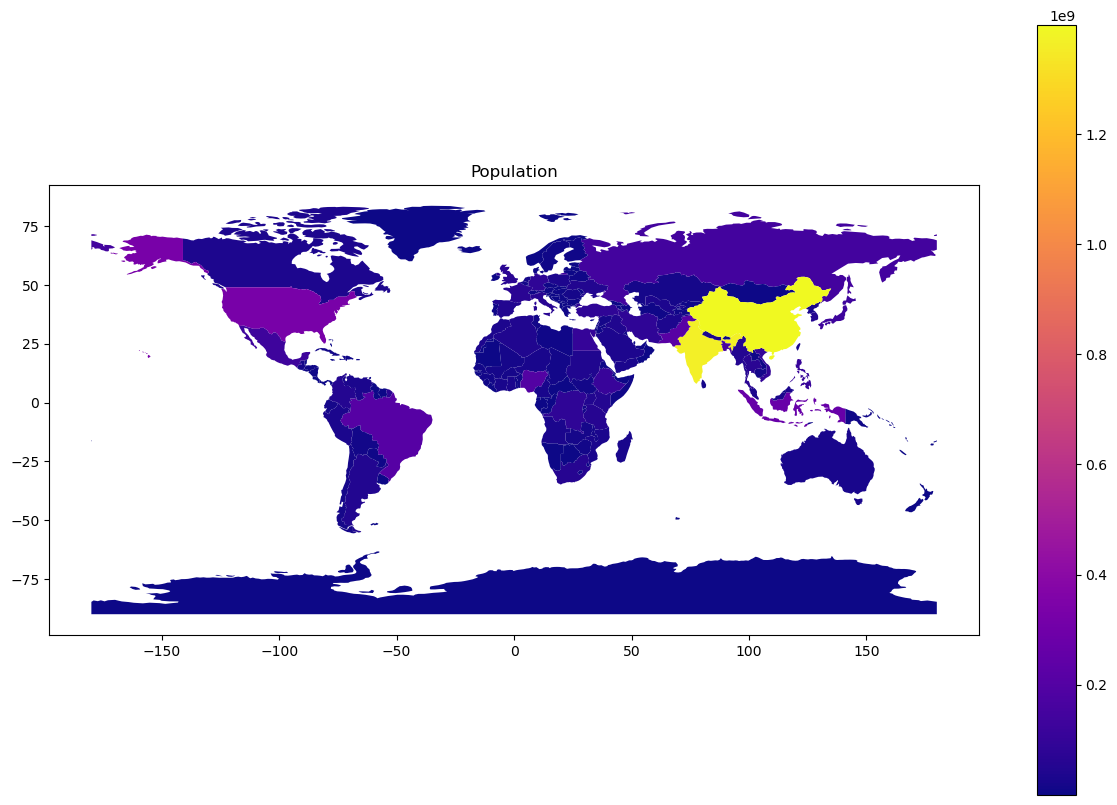

In [1]:

import geopandas as gpd
import matplotlib.pyplot as plt

# Getting free data with 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Drowing county borders
world.plot(
    column='pop_est', 
    legend=True, 
    figsize=(15, 10),
    cmap='plasma'
)
plt.title('Population')
plt.show()

In [22]:

# Creaate the map
m = folium.Map(location=[0, 0], zoom_start=2, width='60%', height='60%')

# Create the pop-ups
for idx, row in world.iterrows():
    popup_text = f"Country: {row['name']}<br>Population: {row['pop_est']}"
    folium.Marker([row.geometry.centroid.y, row.geometry.centroid.x],
                  popup=popup_text).add_to(m)

# Show the map
m